In [1]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer
from sklearn import metrics

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file
dataset = pd.read_csv('water-quality.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :-14]
y = dataset.iloc[:, -14:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (1060, 30)
X.shape: (1060, 16)


std_temp     std_pH   conduct        o2     o2sat       co2  hardness  \
0  0.662303  23.722053  2.973241  5.343706  4.446809  0.000000  3.546433   
1  2.025867  23.722053  3.298439  4.100984  4.072903  0.155396  3.388814   
2  3.253074  23.421773  2.740956  3.645319  4.157477  0.699283  2.955361   
3  3.759541  24.022332  2.657334  3.231078  3.877047  0.000000  3.034170   
4  1.928469  23.121494  2.332136  4.515224  4.429004  0.699283  3.112980   

        no2       no3       nh4       po4        cl      sio2     kmno4  \
0  0.403047  2.362222  0.232044  0.189460  1.459533  1.663324  1.026990   
1  0.345469  2.178153  0.210949  0.526279  1.739018  2.217765  0.837808   
2  0.460625  3.098499  0.097036  0.315767  0.776347  3.188038  0.851321   
3  6.966957  1.932727  0.147664  0.210512  0.817753  2.633596  0.918886   
4  0.633360  2.147475  0.189854  0.357870  1.076535  2.598944  0.851321   

    k2cr2o7       bod  
0  0.841600  0.203596  
1  0.712491  0.150484  
2  0.707709  0.247856  
3  0.736400  0.416043  
4  0.827255  0.345227

y.shape: (1060, 14)


Label1  Label2  Label3  Label4  Label5  Label6  Label7  Label8  Label9  \
0       1       0       0       0       0       1       1       0       1   
1       0       1       0       1       1       1       1       0       1   
2       1       1       0       0       1       0       1       0       1   
3       1       1       0       0       1       1       1       1       1   
4       0       0       1       0       0       1       0       0       1   

   Label10  Label11  Label12  Label13  Label14  
0        1        1        1        1        1  
1        1        1        1        1        0  
2        1        1        0        1        1  
3        1        1        1        0        0  
4        0        0        1        0        1

Descriptive stats:


std_temp       std_pH      conduct           o2        o2sat  \
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000   
mean      2.464376    24.170205     3.073956     4.370396     4.509492   
std       1.059541     0.966318     1.037480     1.045264     1.024500   
min       0.058438    21.019540     0.966303     0.041424     0.048964   
25%       1.636277    23.421773     2.406467     3.893863     4.141897   
50%       2.405717    24.322611     2.950012     4.473800     4.553639   
75%       3.233595    24.923169     3.560921     4.970889     4.976508   
max       5.356859    27.925961    12.422572     8.491936    10.580645   

               co2     hardness          no2          no3          nh4  \
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000   
mean      0.397726     4.034421     0.463015     1.569769     0.265489   
std       1.009108     1.054268     0.957149     1.052141     0.872142   
min       0.000000     1.694407     0.000000     0.000000     0.012657   
25%       0.000000     3.349409     0.057578     0.920346     0.046409   
50%       0.000000     3.940481     0.172734     1.395858     0.084379   
75%       0.427340     4.689172     0.403047     2.055440     0.147664   
max       9.556867     9.930012     8.751880    18.805741    17.086844   

               po4           cl         sio2        kmno4      k2cr2o7  \
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000   
mean      0.294657     0.603969     1.223007     0.581876     0.544428   
std       0.743339     0.643723     0.956059     0.875774     0.750472   
min       0.000000     0.062108     0.069305     0.013513     0.062164   
25%       0.042102     0.238080     0.554441     0.256748     0.205618   
50%       0.105256     0.372647     0.970272     0.351339     0.349073   
75%       0.273665     0.745294     1.559366     0.624978     0.635982   
max      12.314930     6.562724     6.618643    19.107427    14.967098   

               bod  
count  1060.000000  
mean      0.349620  
std       0.544120  
min       0.017704  
25%       0.115076  
50%       0.185892  
75%       0.354079  
max       7.081589

In [3]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (742, 16)
X_test.shape: (318, 16)
y_train.shape: (742, 14)
y_test.shape: (318, 14)


In [4]:
from sklearn.multioutput import ClassifierChain

In [5]:
chain_clf = ClassifierChain(RandomForestClassifier(criterion='entropy'), order='random', random_state=0)
chain_clf.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(criterion='entropy'),
                order='random', random_state=0)

## LIME

In [8]:
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [9]:
# Creating the Lime Explainer
# Be very careful in setting the order of the class names
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="lasso_path",
    class_names=["Label1","Label2","Label3","Label4","Label5","Label6","Label7","Label8","Label9","Label10","Label11","Label12","Label13","Label14"],
    discretize_continuous=True,
    discretizer="entropy",
)

In [11]:
#Now let's pick a sample case from our test set.
row = 0
exp = lime_explainer.explain_instance(X_test.iloc[row], chain_clf.predict_proba, num_features=16)
exp.show_in_notebook(show_table=True)

In [12]:
#Now let's pick a sample case from our test set.
row = 1
exp = lime_explainer.explain_instance(X_test.iloc[row], chain_clf.predict_proba, num_features=16)
exp.show_in_notebook(show_table=True)

## SHAP

In [6]:
# Load ML Interpreting Models
import shap

# Initialize JS For Plot
shap.initjs()

In [7]:
explainer_chain = shap.KernelExplainer(chain_clf.predict_proba, X_train)

Using 742 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### Calculate shap_values of first row of X_test

In [13]:
shap_values = explainer_chain.shap_values(X_test.iloc[0,:])

#### Prediction probabilities of 12,9,10,2

In [14]:
shap.force_plot(explainer_chain.expected_value[11], shap_values[11], X_test.iloc[0,:])

In [15]:
shap.force_plot(explainer_chain.expected_value[8], shap_values[8], X_test.iloc[0,:])

In [16]:
shap.force_plot(explainer_chain.expected_value[9], shap_values[9], X_test.iloc[0,:])

In [17]:
shap.force_plot(explainer_chain.expected_value[1], shap_values[1], X_test.iloc[0,:])

### Prediction probabilities of other labels

In [18]:
shap.force_plot(explainer_chain.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [29]:
shap.force_plot(explainer_chain.expected_value[2], shap_values[2], X_test.iloc[0,:])

In [20]:
shap.force_plot(explainer_chain.expected_value[3], shap_values[3], X_test.iloc[0,:])

In [21]:
shap.force_plot(explainer_chain.expected_value[4], shap_values[4], X_test.iloc[0,:])

In [22]:
shap.force_plot(explainer_chain.expected_value[5], shap_values[5], X_test.iloc[0,:])

In [23]:
shap.force_plot(explainer_chain.expected_value[6], shap_values[6], X_test.iloc[0,:])

In [24]:
shap.force_plot(explainer_chain.expected_value[7], shap_values[7], X_test.iloc[0,:])

In [30]:
shap.force_plot(explainer_chain.expected_value[10], shap_values[10], X_test.iloc[0,:])

In [31]:
shap.force_plot(explainer_chain.expected_value[12], shap_values[12], X_test.iloc[0,:])

In [27]:
shap.force_plot(explainer_chain.expected_value[13], shap_values[13], X_test.iloc[0,:])

### Calculate shap_values of second row of X_test

In [32]:
shap_values = explainer_chain.shap_values(X_test.iloc[1,:])

#### Prediction probabilities of label 3,12,9,11

In [43]:
shap.force_plot(explainer_chain.expected_value[2], shap_values[2], X_test.iloc[1,:])

In [44]:
shap.force_plot(explainer_chain.expected_value[11], shap_values[11], X_test.iloc[1,:])

In [45]:
shap.force_plot(explainer_chain.expected_value[8], shap_values[8], X_test.iloc[1,:])

In [46]:
shap.force_plot(explainer_chain.expected_value[10], shap_values[10], X_test.iloc[1,:])

#### Prediction probabilities of other labels

In [33]:
shap.force_plot(explainer_chain.expected_value[0], shap_values[0], X_test.iloc[1,:])

In [34]:
shap.force_plot(explainer_chain.expected_value[1], shap_values[1], X_test.iloc[1,:])

In [35]:
shap.force_plot(explainer_chain.expected_value[3], shap_values[3], X_test.iloc[1,:])

In [36]:
shap.force_plot(explainer_chain.expected_value[4], shap_values[4], X_test.iloc[1,:])

In [37]:
shap.force_plot(explainer_chain.expected_value[5], shap_values[5], X_test.iloc[1,:])

In [38]:
shap.force_plot(explainer_chain.expected_value[6], shap_values[6], X_test.iloc[1,:])

In [39]:
shap.force_plot(explainer_chain.expected_value[7], shap_values[7], X_test.iloc[1,:])

In [40]:
shap.force_plot(explainer_chain.expected_value[9], shap_values[9], X_test.iloc[1,:])

In [41]:
shap.force_plot(explainer_chain.expected_value[12], shap_values[12], X_test.iloc[1,:])

In [42]:
shap.force_plot(explainer_chain.expected_value[13], shap_values[13], X_test.iloc[1,:])

In [47]:
# using kmeans
X_train_summary = shap.kmeans(X_train, 10)
explainer_chain = shap.KernelExplainer(chain_clf.predict_proba, X_train_summary)
shap_values_KNN_test = explainer_chain.shap_values(X_test)

### Bar chart of feature Importance

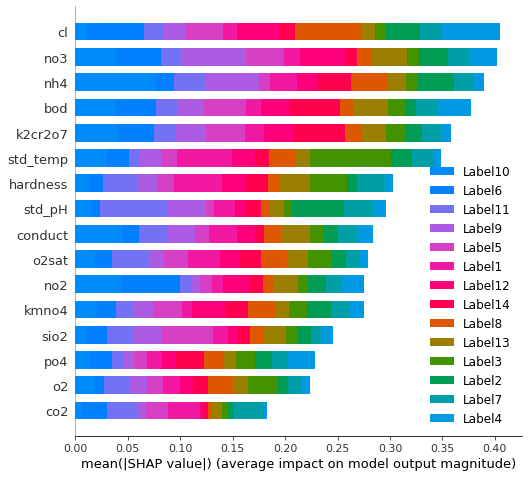

In [48]:
shap.summary_plot(shap_values_KNN_test, X, plot_type="bar",class_names = y.columns.tolist())

In [49]:
shap.force_plot(explainer_chain.expected_value[0], shap_values_KNN_test[0], X_test)

In [50]:
shap.force_plot(explainer_chain.expected_value[1], shap_values_KNN_test[1], X_test)

In [51]:
shap.force_plot(explainer_chain.expected_value[2], shap_values_KNN_test[2], X_test)

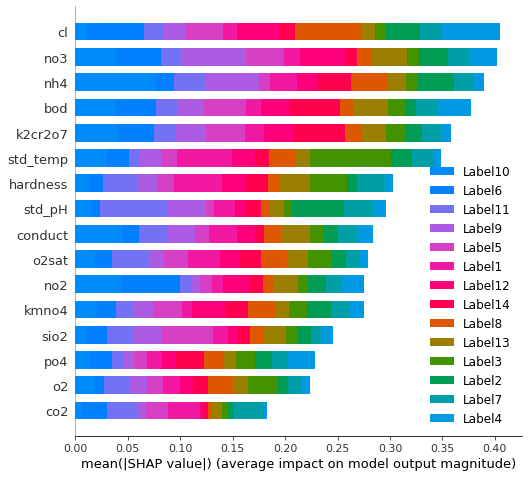

In [52]:
shap.summary_plot(shap_values_KNN_test, X, plot_type="bar",class_names = y.columns.tolist())

#### How each feature impacts Label 10

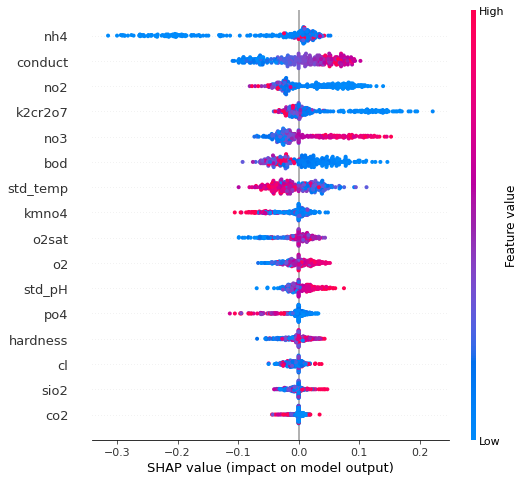

In [53]:
shap.summary_plot(shap_values_KNN_test[9], X_test)

#### How each feature impacts Label 6

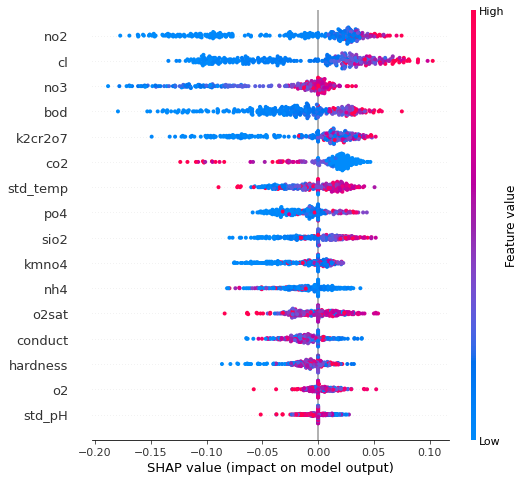

In [54]:
shap.summary_plot(shap_values_KNN_test[5], X_test)

#### How each feature impacts Label 11

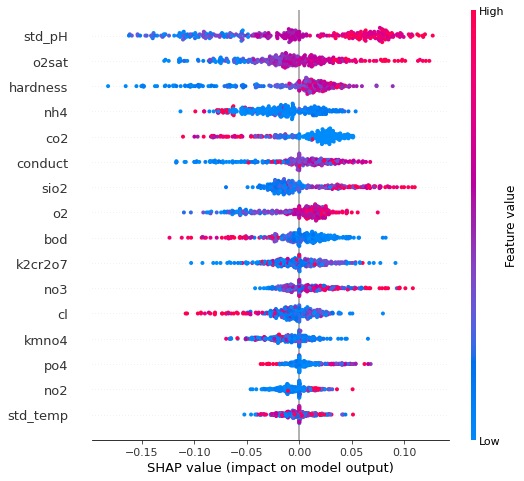

In [55]:
shap.summary_plot(shap_values_KNN_test[10], X_test)

#### How each feature impacts Label 8

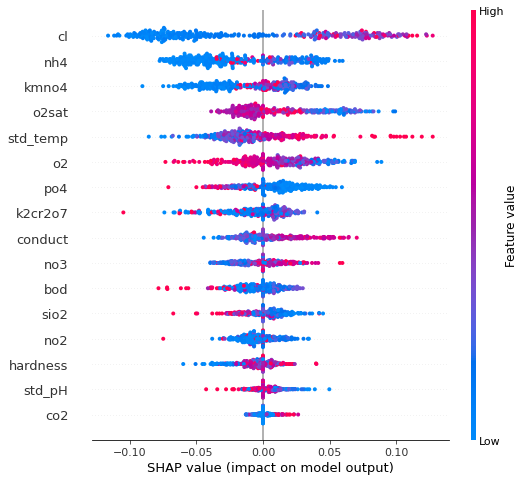

In [56]:
shap.summary_plot(shap_values_KNN_test[7], X_test)

#### Feature "conduct" on Label 10

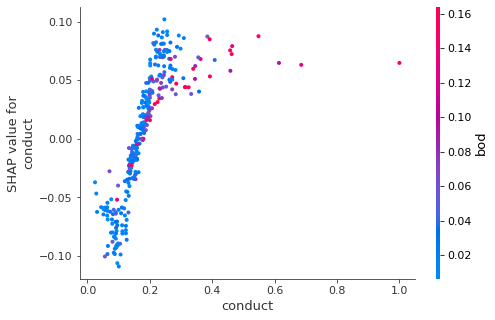

In [58]:
shap.dependence_plot("conduct", shap_values_KNN_test[9], X_test)

### Feature "std_temp" on Label 6

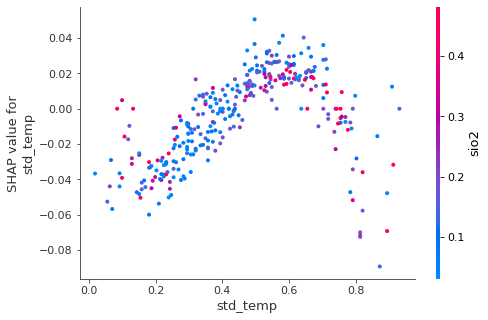

In [60]:
shap.dependence_plot("std_temp", shap_values_KNN_test[5], X_test)

#### Feature "o2sat" on Label 11

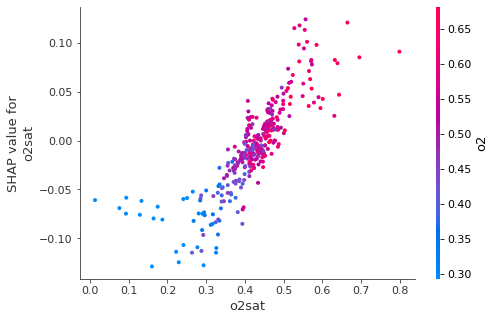

In [61]:
shap.dependence_plot("o2sat", shap_values_KNN_test[10], X_test)

#### Feature "kmno4" on Label 8

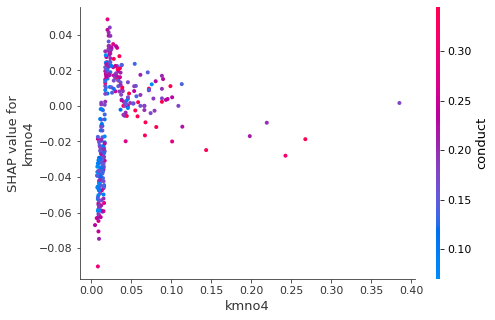

In [62]:
shap.dependence_plot("kmno4", shap_values_KNN_test[7], X_test)